In [67]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import squarify
import circlify
import random
import plotly.express as px
from IPython.core.display import HTML
import matplotlib.patches as patches
import warnings

In [44]:
bill=pd.read_csv("C:/Users/SOUBHIK MANDAL/Desktop/jupyter notebook/Billionaires Trend Analysis/BillionairesIndex.csv",engine="python")
bill

,Rank,Name,Total_Net_Worth,LastChange,YTDChange,Country,Industry
0,1,Elon Musk,$311B,+$9.32B,+$141B,UnitedStates,Technology
1,2,Jeff Bezos,$195B,-$3.79B,+$5.06B,UnitedStates,Technology
2,3,Bernard Arnault,$167B,-$544M,+$52.7B,France,Consumer
3,4,Bill Gates,$136B,+$906M,+$4.40B,UnitedStates,Technology
4,5,Larry Page,$131B,+$1.71B,+$48.7B,UnitedStates,Technology
...,...,...,...,...,...,...,...
495,496,Barry Diller,$5.92B,-$73.5M,+$366M,UnitedStates,Technology
496,497,Cliff Obrecht,$5.89B,$0,+$4.99B,Australia,Services
497,498,Melanie Perkins,$5.89B,$0,+$4.99B,Australia,Services
498,499,Trevor Rees-Jones,$5.89B,-$106M,+$898M,UnitedStates,Energy


In [45]:
bill_=bill.copy()

In [46]:
bill.shape

(500, 7)

In [48]:
bill_.dtypes

Rank                int64
Name               object
Total_Net_Worth    object
LastChange         object
YTDChange          object
Country            object
Industry           object
dtype: object

In [49]:
import re
col=["Total_Net_Worth","LastChange","YTDChange"]
for i in col:
    bill_[i]=[re.sub(r'[^0-9]', ' ', s) for s in bill_[i]]
bill_

,Rank,Name,Total_Net_Worth,LastChange,YTDChange,Country,Industry
0,1,Elon Musk,311,9 32,141,UnitedStates,Technology
1,2,Jeff Bezos,195,3 79,5 06,UnitedStates,Technology
2,3,Bernard Arnault,167,544,52 7,France,Consumer
3,4,Bill Gates,136,906,4 40,UnitedStates,Technology
4,5,Larry Page,131,1 71,48 7,UnitedStates,Technology
...,...,...,...,...,...,...,...
495,496,Barry Diller,5 92,73 5,366,UnitedStates,Technology
496,497,Cliff Obrecht,5 89,0,4 99,Australia,Services
497,498,Melanie Perkins,5 89,0,4 99,Australia,Services
498,499,Trevor Rees-Jones,5 89,106,898,UnitedStates,Energy


In [50]:
 bill_["Total_Net_Worth"]=[a.replace(" ",".")[1:-1] for a in bill_["Total_Net_Worth"]]  

In [51]:
for i in col[1:]:
    bill_[i]=[re.sub("^\s+|\s+$", "", bill_[i][number], flags=re.UNICODE) for number in range(500)]
    bill_[i]=[i.replace(" ",".") for i in (bill_[i])] 

In [52]:
bill_[["Total_Net_Worth","YTDChange","LastChange"]]= 
bill_[["Total_Net_Worth","YTDChange","LastChange"]].apply(pd.to_numeric,axis=1)

In [53]:
bill_["YTDChange"]=[j*1000 if i>=j else j for i,j in zip(bill_["Total_Net_Worth"],bill_["YTDChange"])]

In [54]:
bill_["LastChange"]=[j*1000 if i>=j else j for i,j in zip(bill_["Total_Net_Worth"],bill_["LastChange"])]

In [55]:
empty=[]
for elem in col[1:]:
    for in_elem in bill[elem]:
        new=in_elem[0]
        empty.append(new)

In [56]:
bill_["sign_Lastchange"]=(empty[0:500])
bill_["sign_Ytdchange"]=empty[500:]

In [57]:
bill_["LastChange"]=bill_["LastChange"]*0.001
bill_["YTDChange"]=bill_["YTDChange"]*0.001

In [58]:
list_empty,list_empty1=[],[]
for a,b,c in zip(bill_["Total_Net_Worth"],bill_["sign_Lastchange"],bill_["LastChange"]):
    if b=="-":
        value = a+c
    elif b=="+":
         value=a-c
    else:
        value=a
    list_empty.append(value)
for a,b,c in zip(bill_["Total_Net_Worth"],bill_["sign_Ytdchange"],bill_["YTDChange"]):
    if b=="-":
        value = a+c
    elif b=="+":
         value=a-c
    else:
        value=a
    list_empty1.append(value)

In [59]:
bill_["second_lastchange_NetWorth"]=list_empty
bill_["lastyear_NetWorth"]=list_empty1

In [60]:
bill_

,Rank,Name,Total_Net_Worth,LastChange,YTDChange,Country,Industry,sign_Lastchange,sign_Ytdchange,second_lastchange_NetWorth,lastyear_NetWorth
0,1,Elon Musk,311.00,9.3200,141.000,UnitedStates,Technology,+,+,301.6800,170.000
1,2,Jeff Bezos,195.00,3.7900,5.060,UnitedStates,Technology,-,+,198.7900,189.940
2,3,Bernard Arnault,167.00,0.5440,52.700,France,Consumer,-,+,167.5440,114.300
3,4,Bill Gates,136.00,0.9060,4.400,UnitedStates,Technology,+,+,135.0940,131.600
4,5,Larry Page,131.00,1.7100,48.700,UnitedStates,Technology,+,+,129.2900,82.300
...,...,...,...,...,...,...,...,...,...,...,...
495,496,Barry Diller,5.92,0.0735,0.366,UnitedStates,Technology,-,+,5.9935,5.554
496,497,Cliff Obrecht,5.89,0.0000,4.990,Australia,Services,$,+,5.8900,0.900
497,498,Melanie Perkins,5.89,0.0000,4.990,Australia,Services,$,+,5.8900,0.900
498,499,Trevor Rees-Jones,5.89,0.1060,0.898,UnitedStates,Energy,-,+,5.9960,4.992


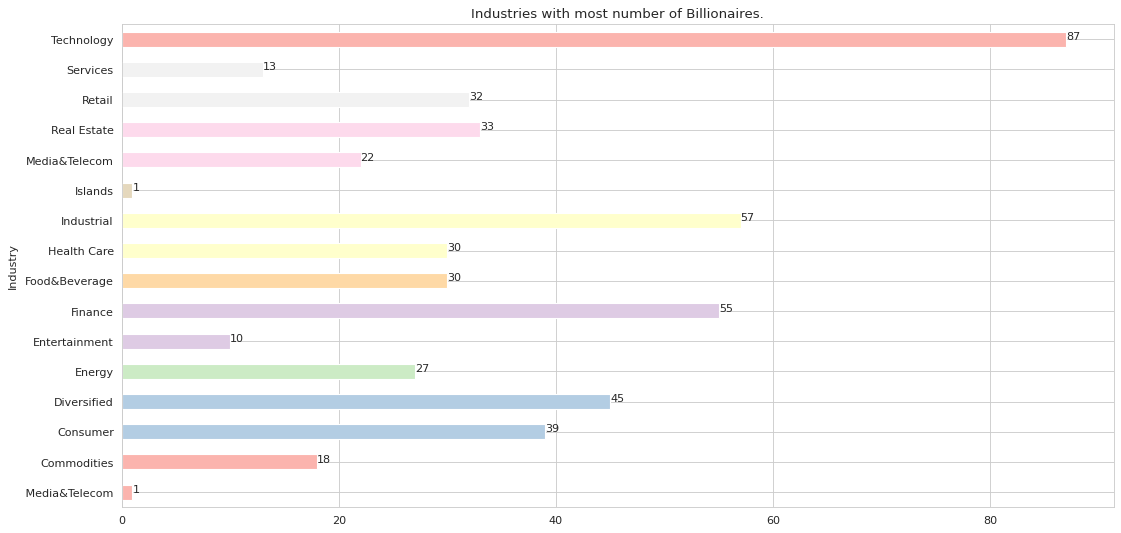

In [61]:
vals="Total_Net_Worth"
industry=bill_.groupby("Industry")["Name"].count()
plt.figure(figsize=(16,8),dpi= 80)
colors = [plt.cm.Pastel1(i/float(len(vals)-1)) for i in range(len(industry.values.tolist()))]
industry.plot.barh(industry.values.tolist(),color=colors[:len(vals)])
for index, value in enumerate(industry.values.tolist()):
    plt.text(value, index,
             str(value))
plt.title("Industries with most number of Billionaires.")
plt.show()

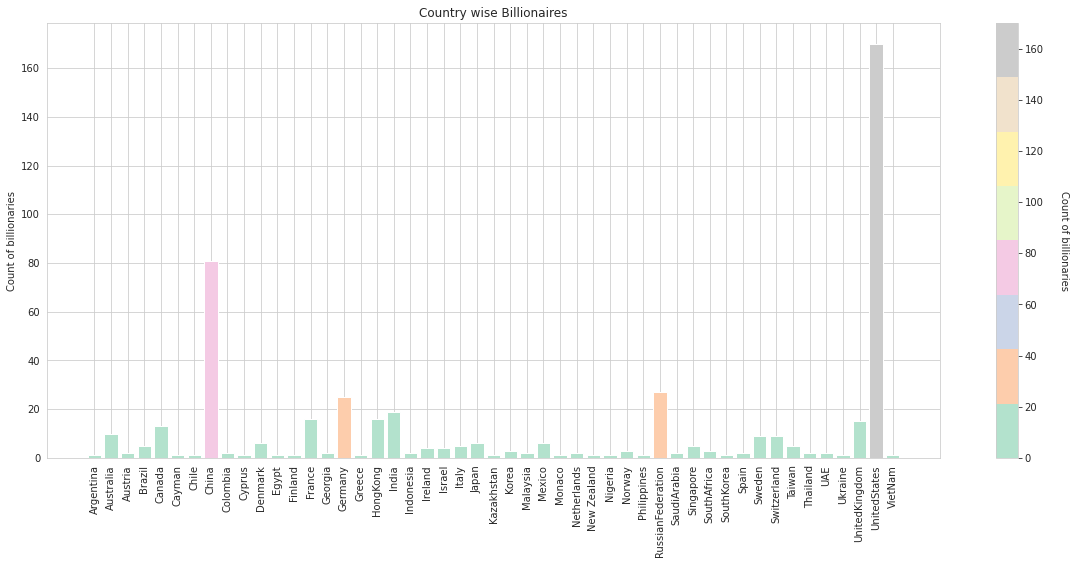

In [62]:
data_x = bill_.groupby("Country")["Name"].count().keys().tolist()
data_hight = bill_.groupby("Country")["Name"].count().values.tolist()
data_color = bill_.groupby("Country")["Name"].count().values.tolist()
data_color_normalized = [x / max(data_color) for x in data_color]
fig, ax = plt.subplots(figsize=(20, 8))
my_cmap = plt.cm.get_cmap('Pastel2')
colors = my_cmap(data_color_normalized)
rects = ax.bar(data_x, data_hight, color=colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_color)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Count of billionaries', rotation=270,labelpad=25)
plt.xticks(data_x,rotation=90)
plt.ylabel("Count of billionaries")
plt.title('Country wise Billionaires')
plt.savefig("bar_chart_with_colorbar_01.png", bbox_inches='tight')
plt.show()

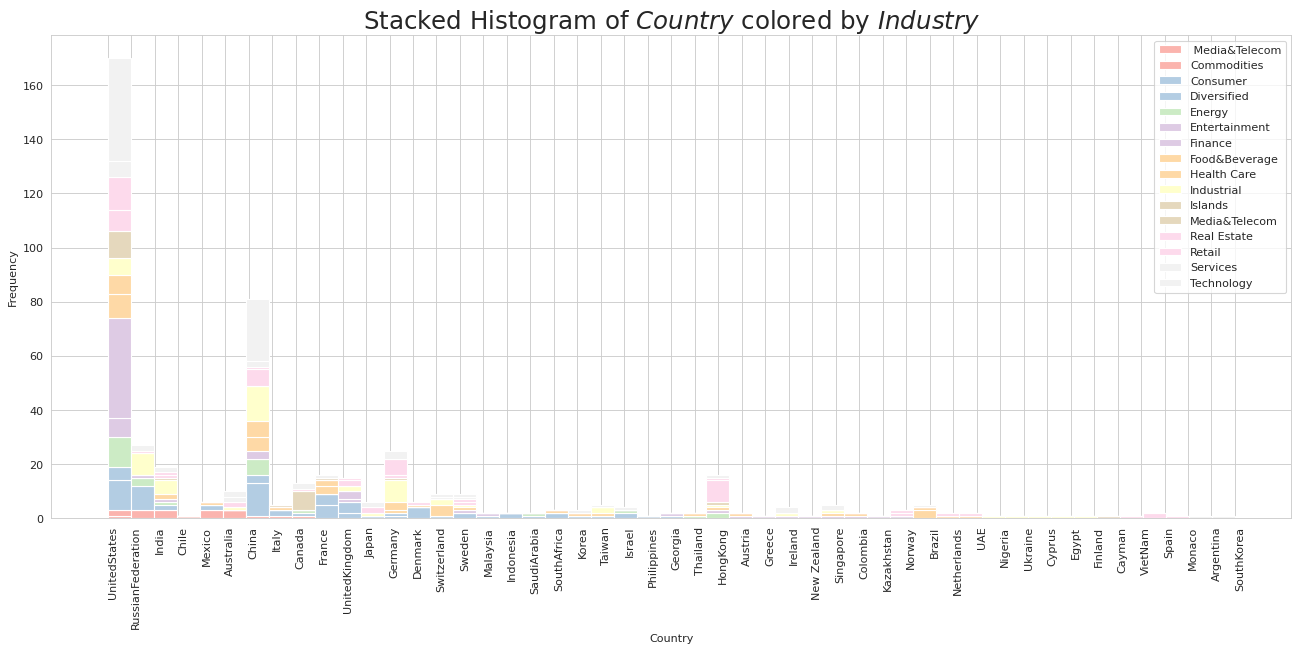

In [64]:
x_var = 'Country'
groupby_var = 'Industry'
df_agg = bill_.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [bill_[x_var].values.tolist() for i, bill_ in df_agg]
plt.figure(figsize=(20,8), dpi= 80)
colors = [plt.cm.Pastel1(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, bill_[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])
plt.legend({group:col for group, col in zip(np.unique(bill_[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment='left')
plt.show()

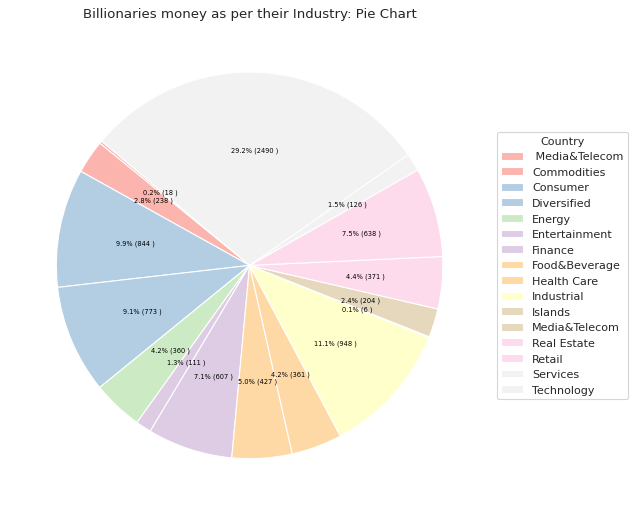

In [66]:
df = bill_.groupby('Industry')['Total_Net_Worth'].sum().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(20, 8), subplot_kw=dict(aspect="equal"), dpi= 80)
data = df['counts']
categories = df['Industry']
colors = [plt.cm.Pastel1(i/float(len(vals)-1)) for i in range(len(vals))]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)
wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="black"),startangle=140,colors=colors[:len(vals)])
ax.legend(wedges, categories, title="Country", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=6, weight=0)
ax.set_title("Billionaries money as per their Industry: Pie Chart")
plt.show()

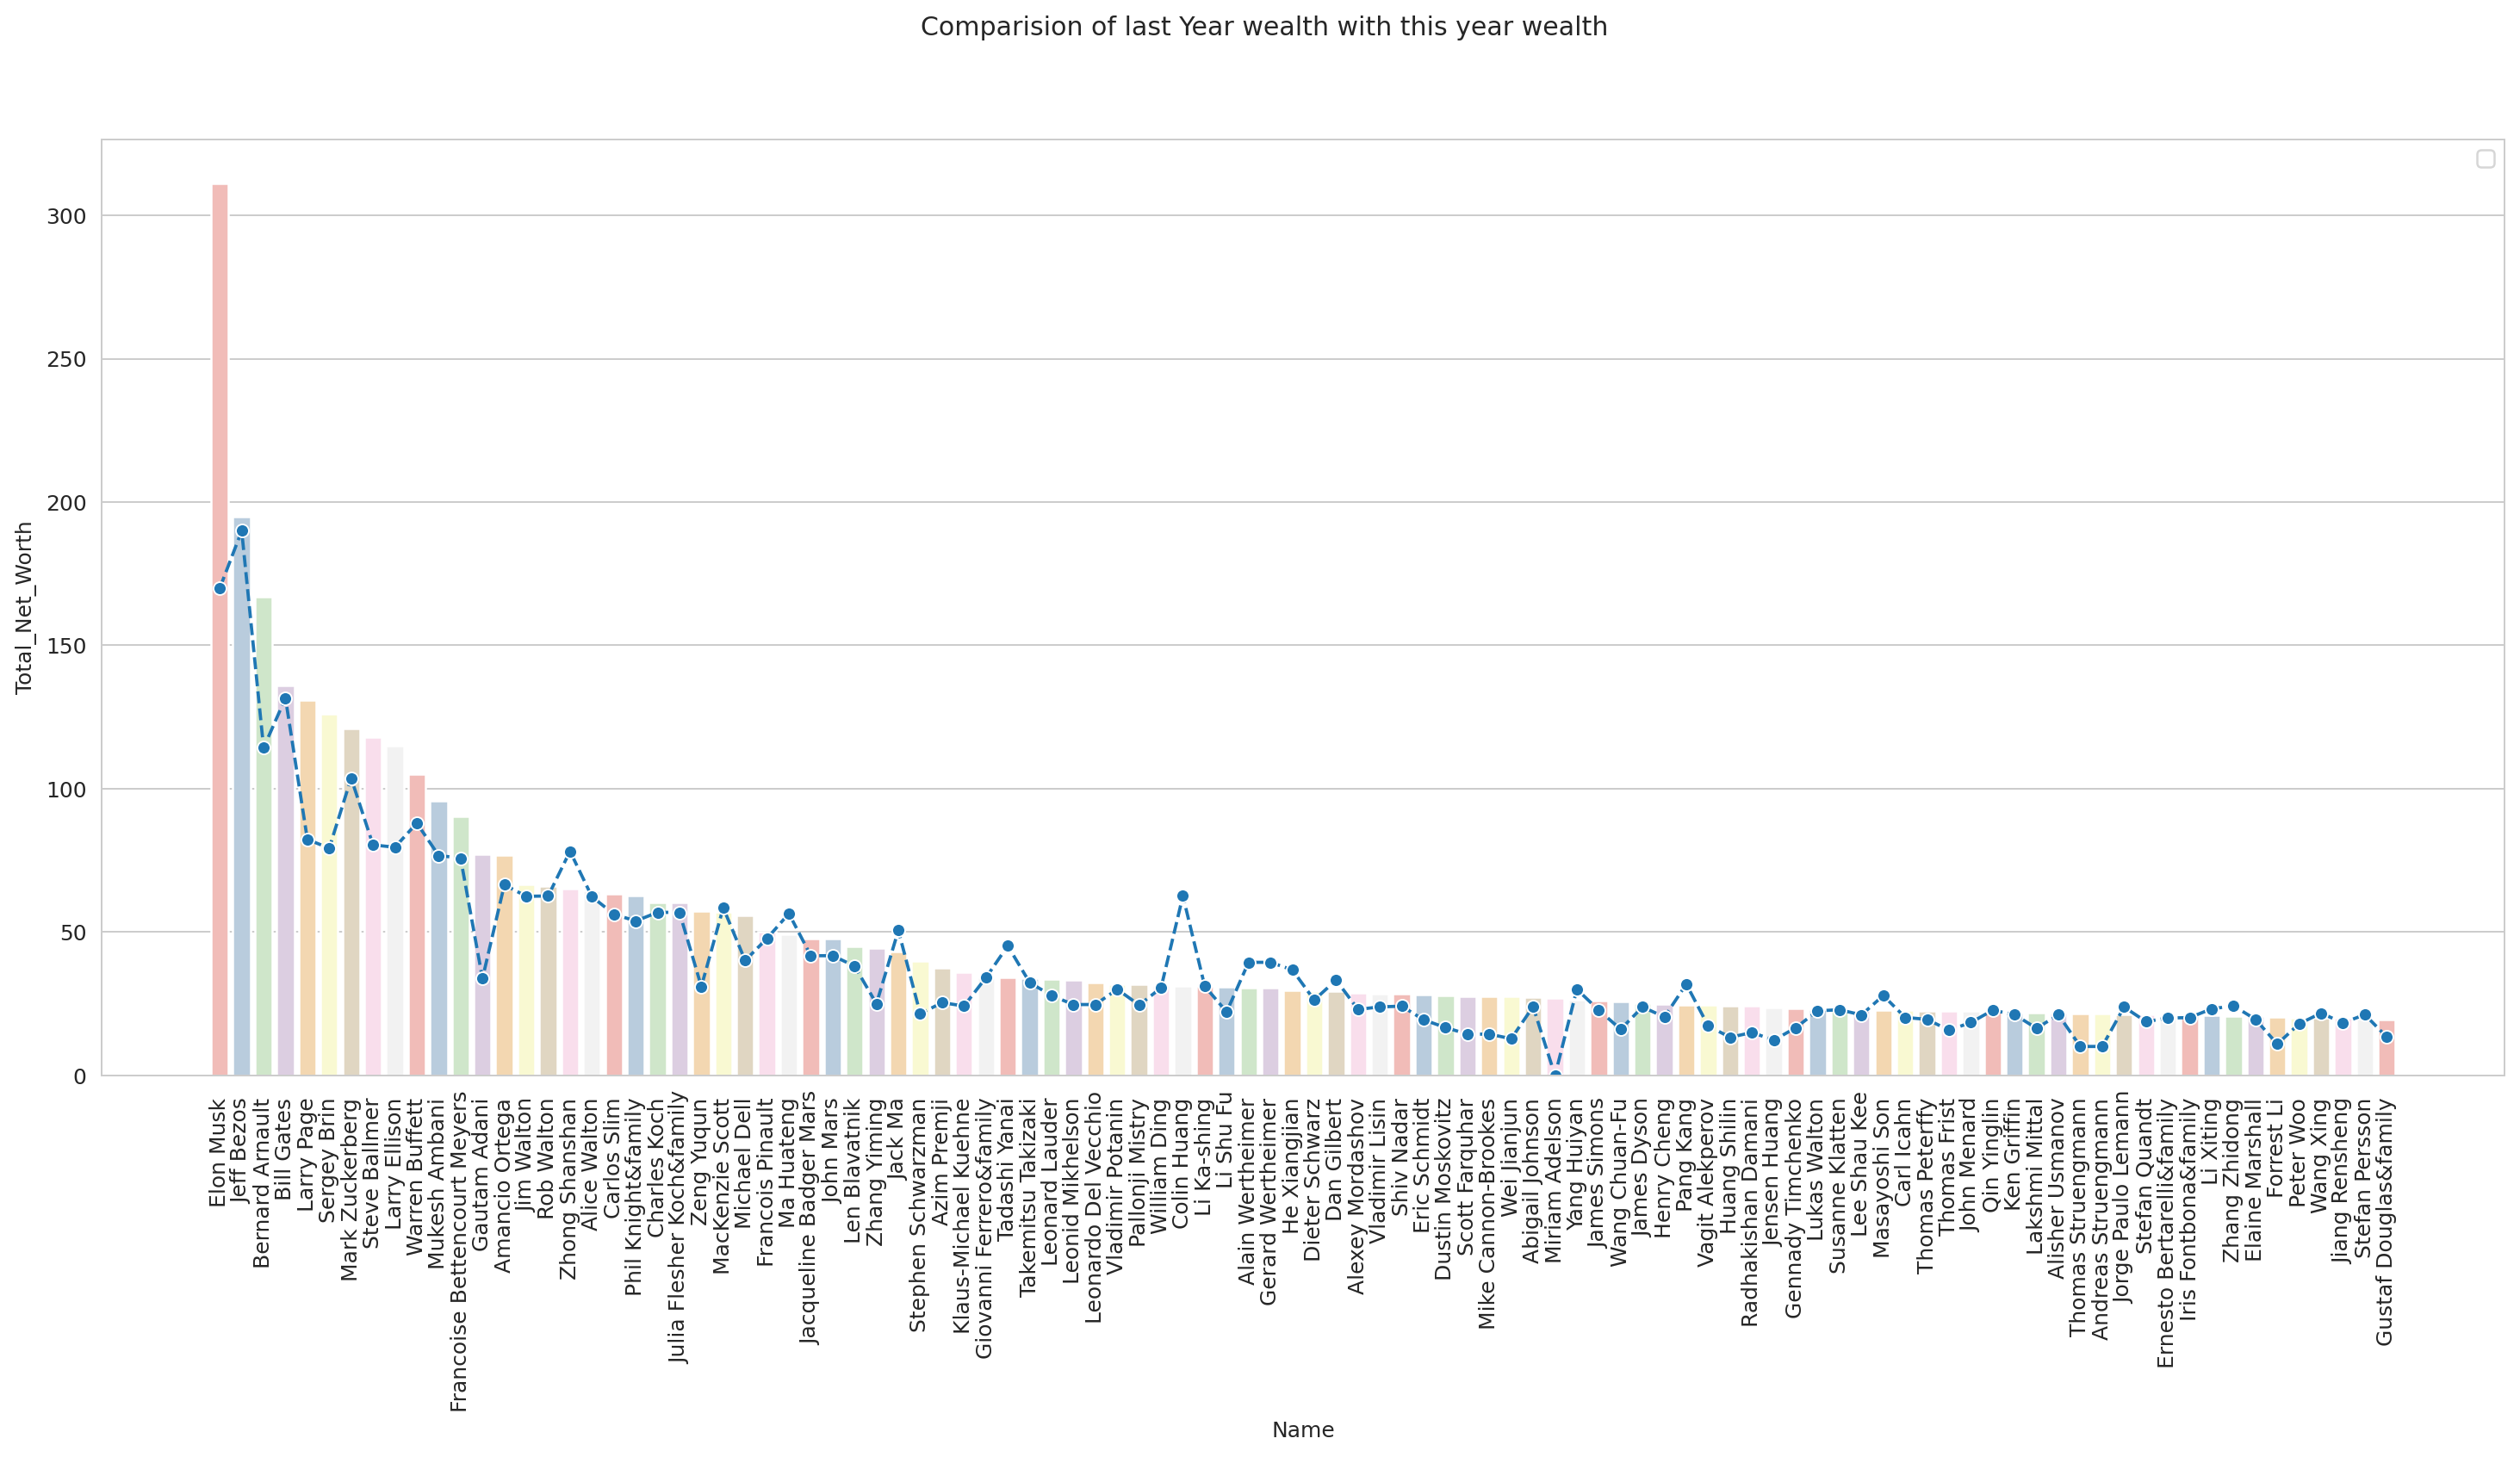

In [68]:
fig,axs=plt.subplots(figsize=(20,8),dpi=180)
sns.barplot(x="Name",y="Total_Net_Worth",data=bill_.head(100),ax=axs,palette="Pastel1")
sns.lineplot(x="Name",y="lastyear_NetWorth",data=bill_.head(100),ax=axs,marker="o",linestyle="dashed");
plt.suptitle("Comparision of last Year wealth with this year wealth")
axs.legend()
plt.xticks(rotation=90);plt.show()

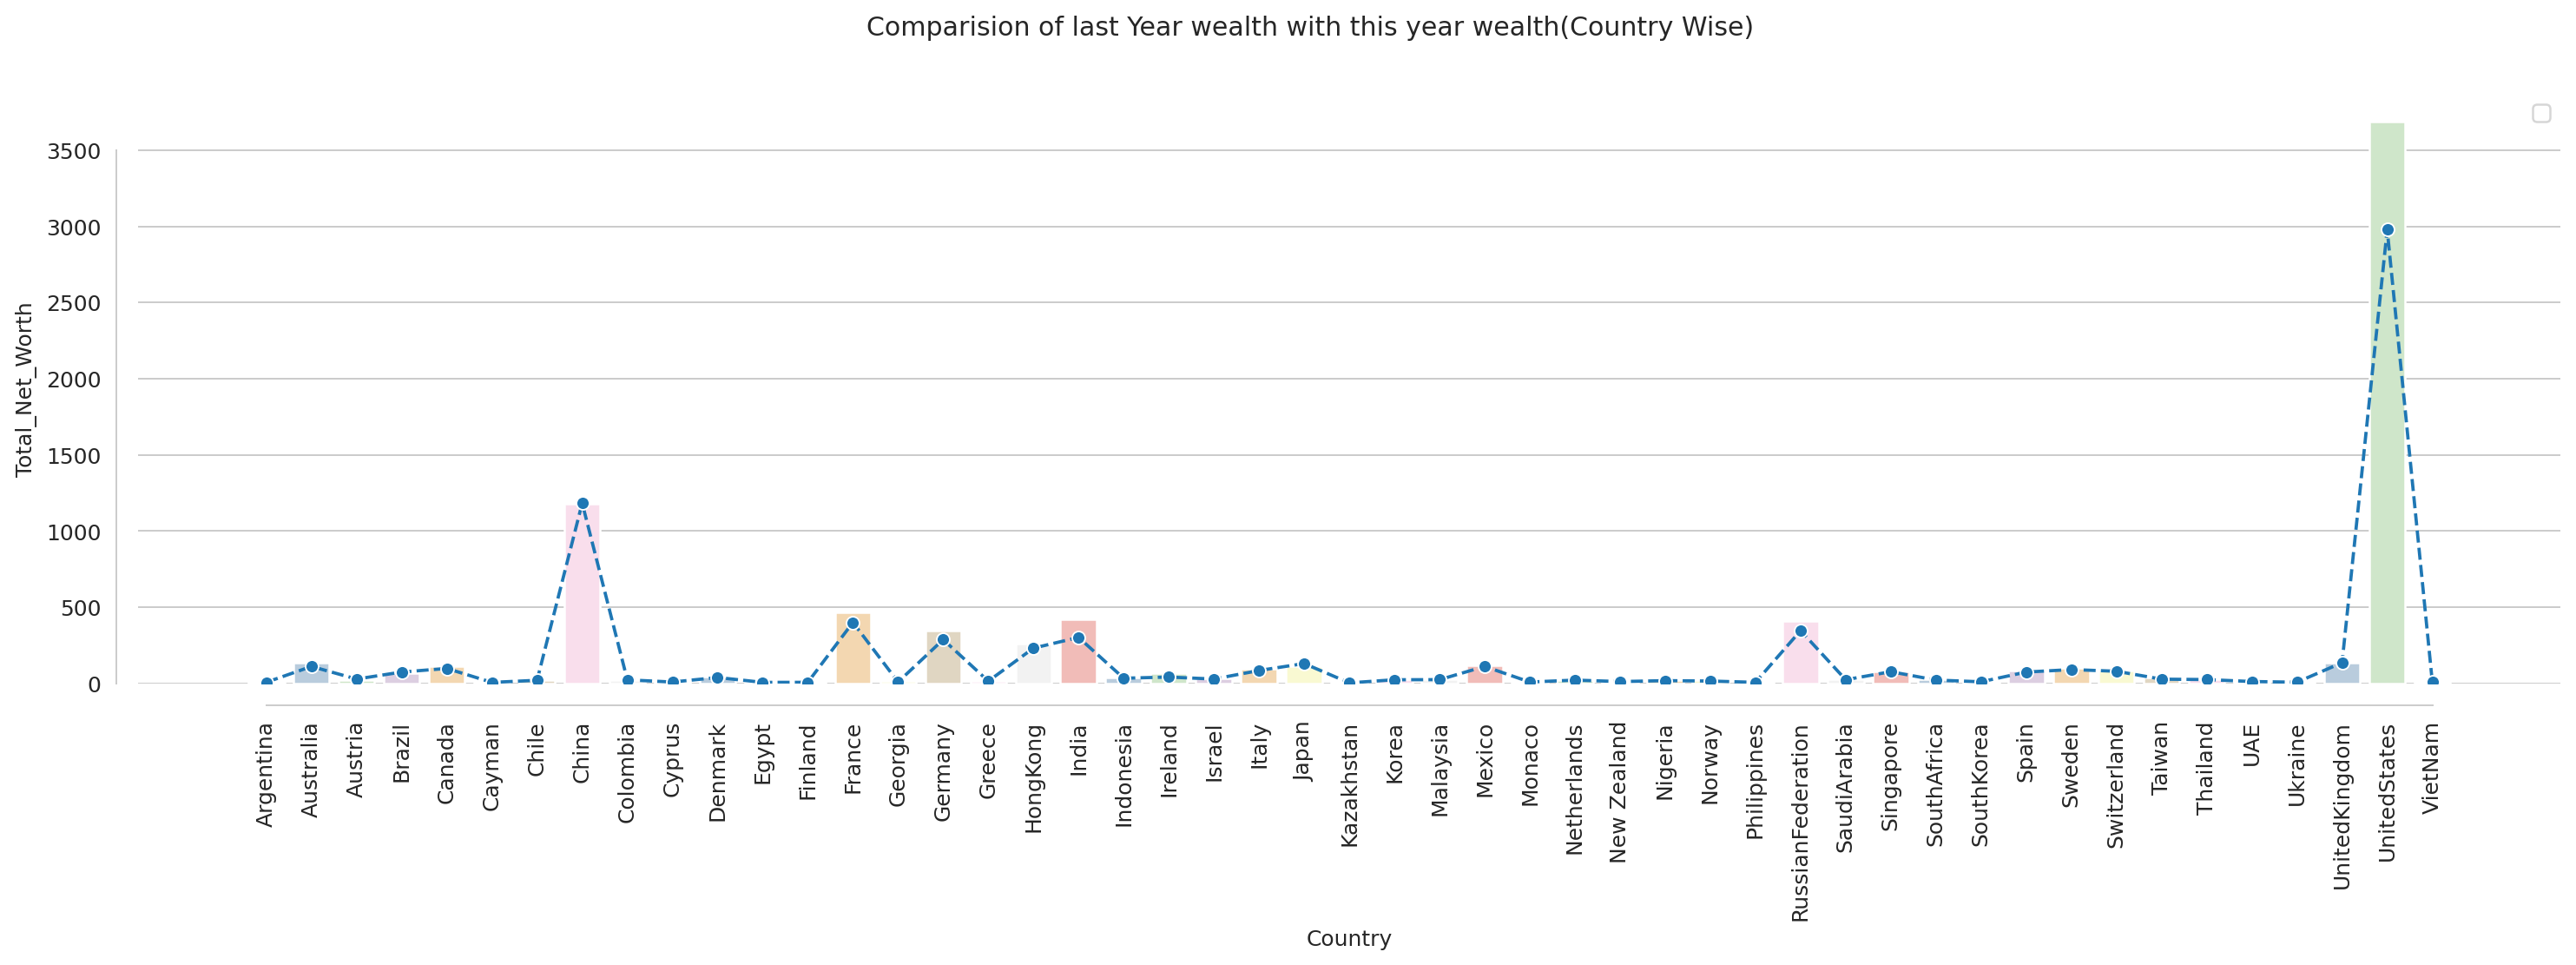

In [69]:
fig,axs=plt.subplots(figsize=(20,5),dpi=180)
sns.set_style("whitegrid")
l1=sns.barplot(x="Country",y="Total_Net_Worth",data=bill_[["Country","Total_Net_Worth","lastyear_NetWorth"]].groupby(["Country"]).sum().reset_index(),ax=axs,palette="Pastel1")
l2=sns.lineplot(x="Country",y="lastyear_NetWorth",data=bill_[["Country","Total_Net_Worth","lastyear_NetWorth"]].groupby(["Country"]).sum().reset_index(),ax=axs,marker="o",linestyle="dashed");
plt.suptitle("Comparision of last Year wealth with this year wealth(Country Wise)")
plt.legend([l1, l2],["Current Wealth", "Last Year Wealth"])
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
plt.show()

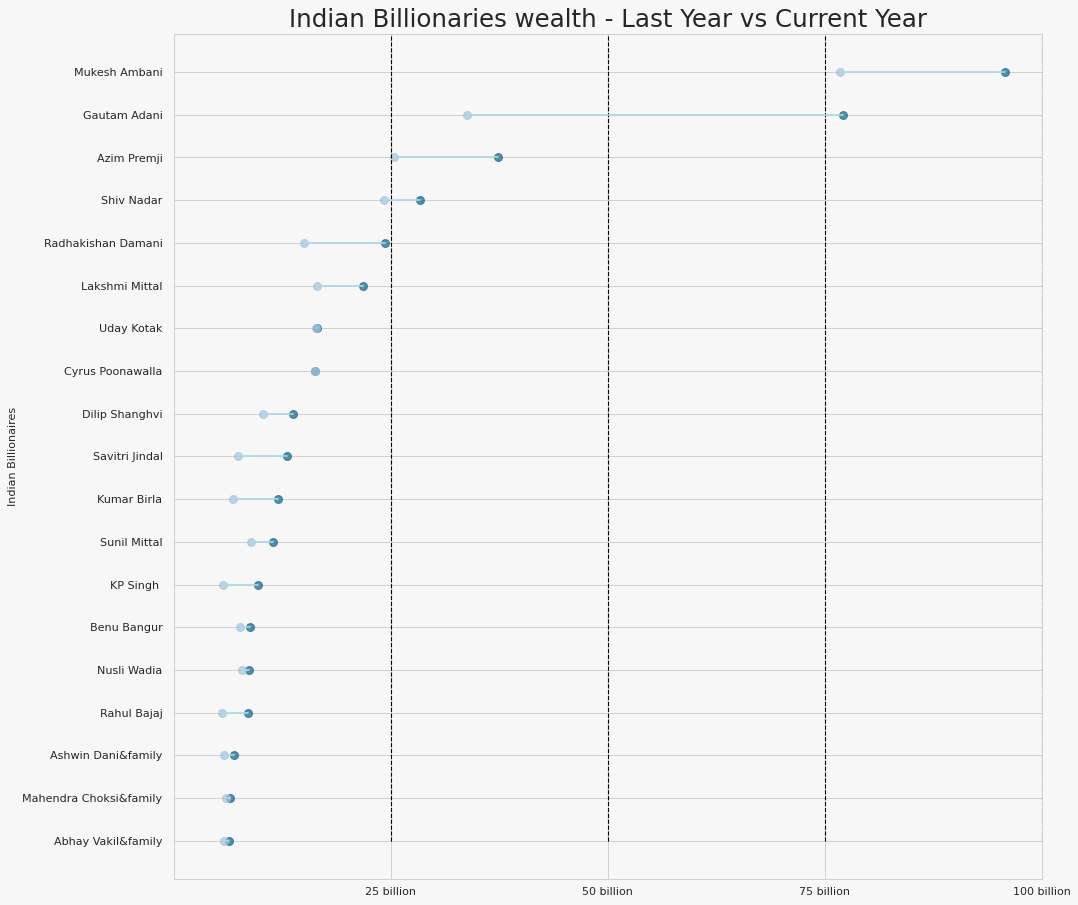

In [72]:
df=bill_[bill_.Country=="India"].sort_values('Total_Net_Worth')
df.reset_index(inplace=True)
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = matplotlib.lines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color="lightblue")
    ax.add_line(l)
    return l
fig, ax = plt.subplots(1,1,figsize=(14,14), facecolor='#f7f7f7', dpi= 80)
ax.vlines(x=25, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dashed')
ax.vlines(x=50, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dashed')
ax.vlines(x=75, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dashed')
ax.vlines(x=100, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dashed')
ax.scatter(y=df['Name'], x=df['Total_Net_Worth'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=df['Name'], x=df['lastyear_NetWorth'], s=50, color='#a3c4dc', alpha=0.7)
for i, p1, p2 in zip(df['Name'], df['lastyear_NetWorth'], df['Total_Net_Worth']):
    newline([p1, i], [p2, i])
ax.set_facecolor('#f7f7f7')
ax.set_title("Indian Billionaries wealth - Last Year vs Current Year", fontdict={'size':22})
ax.set(xlim=(0,20), ylabel='Indian Billionaires')
ax.set_xticks([25, 50, 75, 100])
ax.set_xticklabels(['25 billion', '50 billion', '75 billion', '100 billion'])
plt.show()

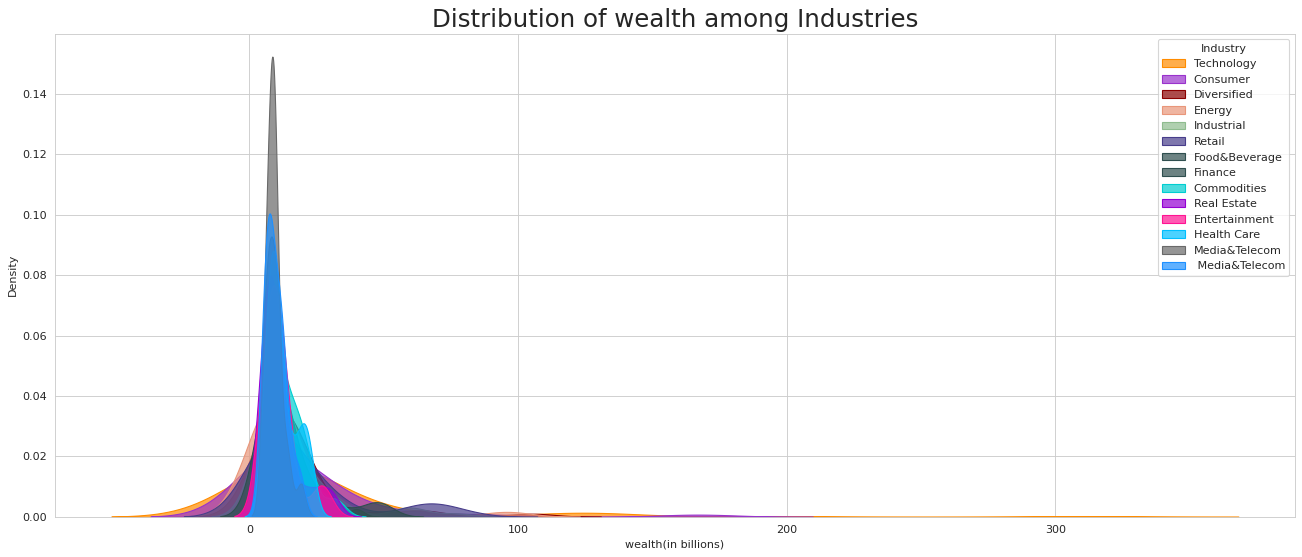

In [74]:
df=bill_.loc[:,["Industry","Total_Net_Worth"]]
colors=[k for k,v in matplotlib.colors.cnames.items()][30:46]
Industries=df["Industry"].unique().tolist()
plt.figure(figsize=(20,8), dpi= 80)
for elem1,elem2 in zip(Industries,colors):
    sns.kdeplot(df.loc[df['Industry'] == elem1, "Total_Net_Worth"], shade=True, color=elem2, label=str(i), alpha=.7)
plt.xlabel("wealth(in billions)")
plt.title('Distribution of wealth among Industries', fontsize=22)
plt.legend(labels=Industries,title="Industry")
plt.show()

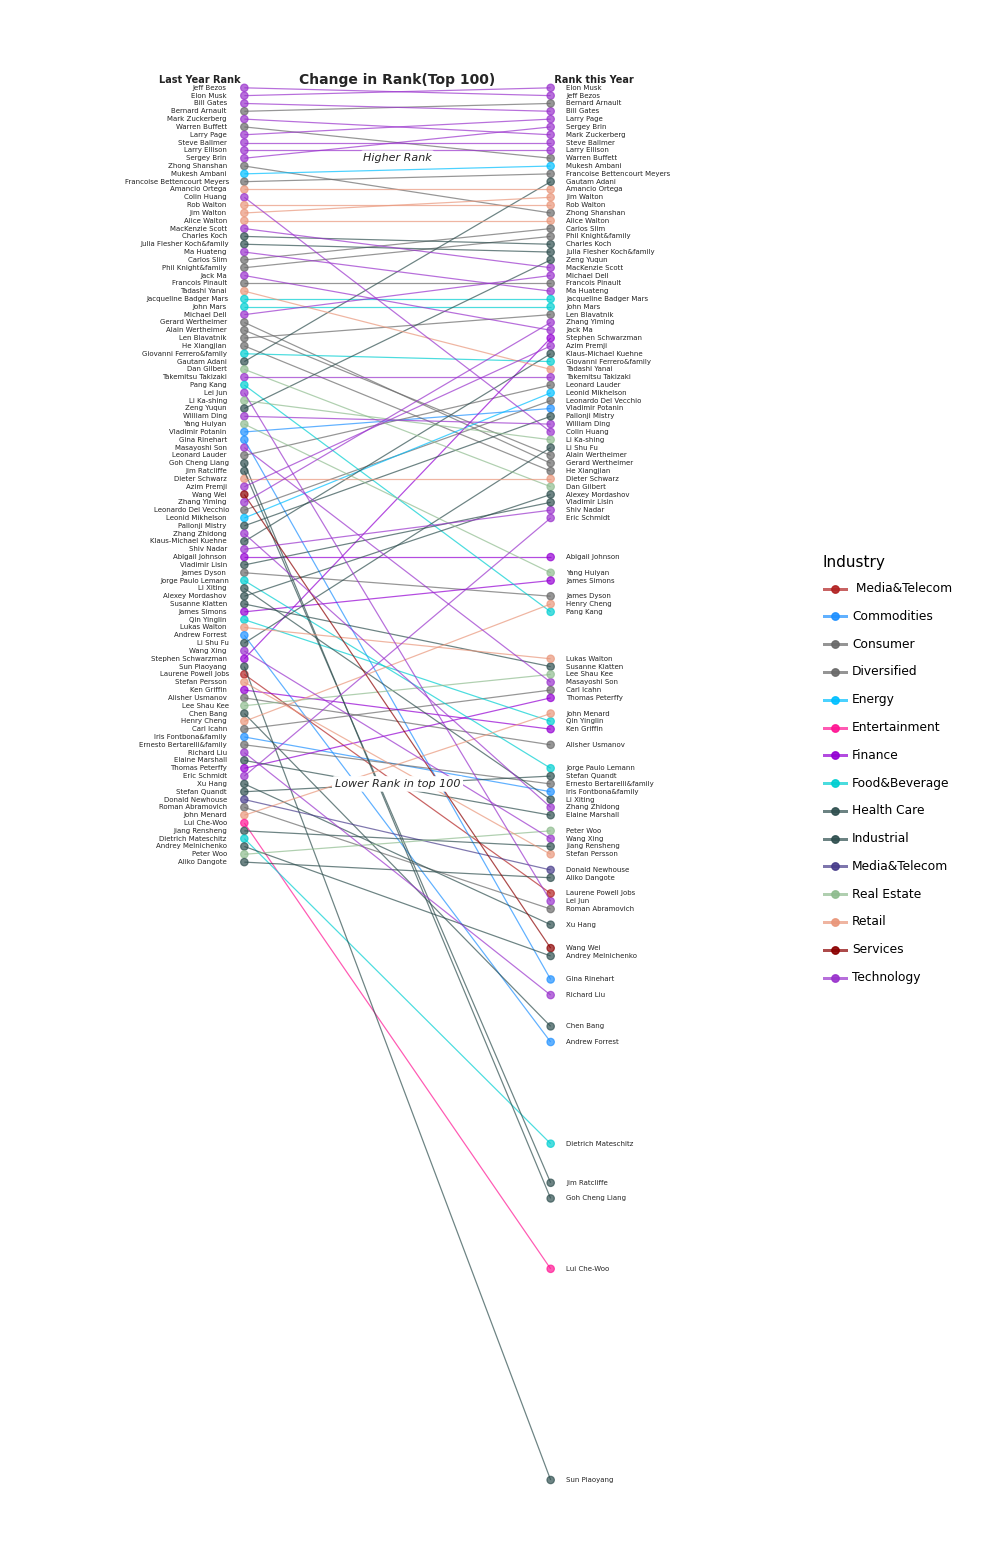

<ggplot: (8778632728829)>

In [75]:
last_year_rank=bill_.loc[:,["Name","Rank","lastyear_NetWorth","Industry"]]
lastyear_rank=last_year_rank.sort_values(["lastyear_NetWorth"],ascending=False)
lastyear_rank["lastYearRank"]=[i for i in range(1,501)]
black1 = '#252525'
black2 = '#222222'
def Reverse(lst):
    return [ele for ele in reversed(lst)]
(ggplot(lastyear_rank.head(100))
 + geom_text(aes(1, 'lastYearRank', label='Name'), nudge_x=-0.05, ha='right', size=5, color=black1)
 + geom_text(aes(2, 'Rank', label='Name'), nudge_x=0.05, ha='left', size=5, color=black1)
 + geom_point(aes(1, 'lastYearRank', color='Industry'), size=2.5, alpha=.7)
 + geom_point(aes(2, 'Rank', color='Industry'), size=2.5, alpha=.7)
 + geom_segment(aes(x=1, y='lastYearRank', xend=2, yend='Rank', color='Industry'), alpha=.7)
 + annotate('text', x=1, y=0, label='Last Year Rank ', fontweight='bold', ha='right', size=7, color=black2)
 + annotate('text', x=2, y=0, label=' Rank this Year ', fontweight='bold', ha='left', size=7, color=black2)
 + annotate('text', x=1.5, y=0, label='Change in Rank(Top 100)',fontweight='bold', size=10, color=black1)
 + annotate('label', x=1.5, y=10, label='Higher Rank', size=8, color=black1,label_size=0, fontstyle='italic')
 + annotate('label', x=1.5, y=90, label='Lower Rank in top 100', size=8, color=black1,
            label_size=0, fontstyle='italic')
 + lims(x=(0.35, 2.65))
 + labs(color='Industry')
 # Countries with lower rates on top
 + scale_y_reverse()
 # Change colors
 + scale_color_manual(values = Reverse(colors))
 # Removes all decorations
 + theme_void()
 # Changing the figure size prevents the country names from squishing up
 + theme(figure_size=(10, 20))
)

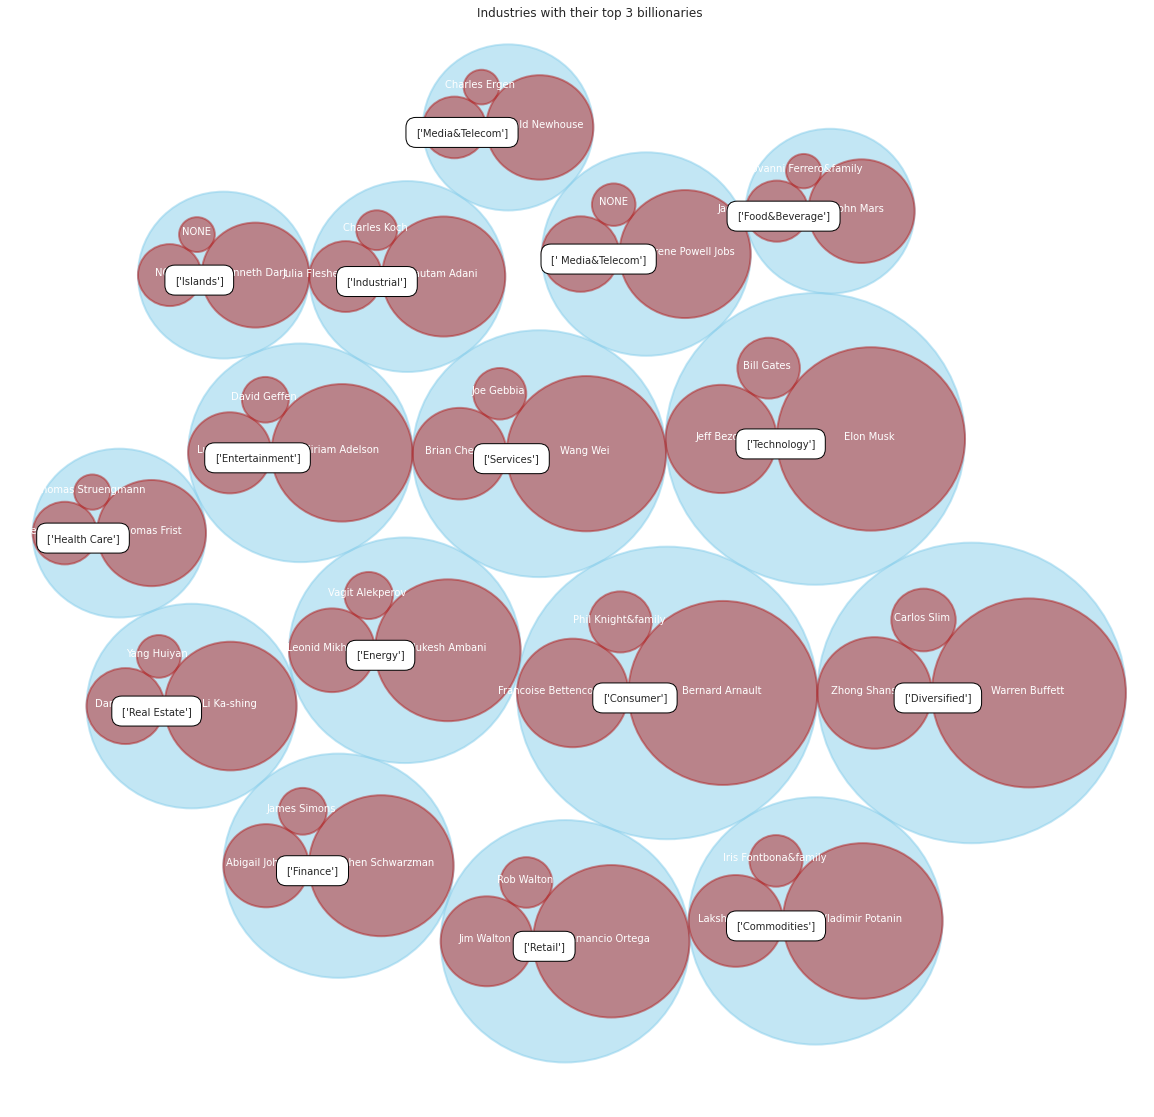

In [82]:
data_bill=bill_.sort_values(by=["Total_Net_Worth"],ascending=False).groupby(["Industry","Name"]).sum()["Total_Net_Worth"].to_frame().reset_index()
list_empty2=[]
for i in list(data_bill["Industry"].unique()):
    data_bill_1=data_bill[data_bill["Industry"]== i].sort_values(by=["Total_Net_Worth"],ascending=False).head(3)
    value1=data_bill_1["Industry"].unique().tolist()
    value2=data_bill_1["Name"].unique().tolist()
    list_empty2.append([value1,value2])
datum_list=random.sample(range(150448697, 650448697), 16)
industry_no=[i for i in range(0,data_bill["Industry"].nunique())]
list_empty2[0][1].append('NONE')
list_empty2[0][1].append('NONE')
list_empty2[10][1].append('NONE')
list_empty2[10][1].append('NONE')
empty_list3=[]
for i,j in zip(datum_list,industry_no):
    elem={'id' : list_empty2[j][0], 'datum': i,
                   'children' : [
                     {'id' :list_empty2[j][1][0]  , 'datum' : 308865000},
                     {'id' :list_empty2[j][1][1]  , 'datum' : 107550697},
                     {'id' :list_empty2[j][1][2]  , 'datum' : 34033000} 
                   ]}
    empty_list3.append(elem)
data=[{'id': 'Industry', 'datum': data_bill["Total_Net_Worth"].sum() , 'children' :empty_list3}]
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title('Industries with their top 3 billionaries')
ax.axis('off')
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="skyblue"))
for circle in circles:
    if circle.level != 3:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="firebrick"))
    plt.annotate(label, (x,y ), ha='center', color="white")
for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y) ,va='top', ha='right', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=1))